# Explanatory Analysis Notebook

##### Imports

In [ ]:
# General
import os
import numpy as np
import pandas as pd

# Dataset
from google.colab import drive  

# Warnings
import warnings

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.manifold import Isomap

##### Hide Warnings

In [ ]:
warnings.filterwarnings('ignore')

##### Disable Autoscrolling

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

##### Access To Dataset

In [ ]:
drive.mount(r'/content/drive/',force_remount=True) 

data_dir = os.getcwd() + '/drive/My Drive/Colab Notebooks/DeepLearning/FinalProject/data/'
data_dir

Mounted at /content/drive/


'/content/drive/My Drive/Colab Notebooks/DeepLearning/FinalProject/data/'

In [ ]:
os.listdir(data_dir)

['data_to_test.csv',
 'data_to_val.csv',
 'data_to_tra.csv',
 'category_and_image_downscaled_data.zip']

##### Load training set

In [ ]:
df = pd.read_csv(data_dir + 'category_and_image_downscaled_data.zip', compression="zip")
df.shape

(142480, 2327)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,set_id,set_views,set_likes,date,set_name,desc,number_of_items,days_since_post,items_likes,set_price,index,item_name,item_price,item_likes,image,categoryid,category_name,categorytype_id,categorytype,category,num items,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,0,214181831,8743,394,One month,Casual,A fashion look from January 2017 by beebeely-l...,7,30.0,4755,640.0,1,mock neck embroidery suede sweatshirt,24.0,10,/content/drive/My Drive/data/images_clean/2141...,4495,Sweatshirts,1,tops,Sweatshirts,694,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,1,1,214181831,8743,394,One month,Casual,A fashion look from January 2017 by beebeely-l...,7,30.0,4755,640.0,2,luxe double zip hooded jacket,150.0,2250,/content/drive/My Drive/data/images_clean/2141...,25,Jackets,0,outer,Jackets,3192,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,234.0,166.0,253.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,2,2,214181831,8743,394,One month,Casual,A fashion look from January 2017 by beebeely-l...,7,30.0,4755,640.0,3,citizens humanity high rise rocket hem jean,248.0,2437,/content/drive/My Drive/data/images_clean/2141...,27,Jeans,3,bottoms,Jeans,929,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,254.0,...,124.0,137.0,135.0,127.0,124.0,140.0,151.0,135.0,124.0,149.0,137.0,143.0,133.0,138.0,139.0,142.0,139.0,133.0,140.0,149.0,145.0,135.0,132.0,143.0,123.0,131.0,129.0,116.0,158.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,3,3,214181831,8743,394,One month,Casual,A fashion look from January 2017 by beebeely-l...,7,30.0,4755,640.0,4,suede tie short boots,37.0,2,/content/drive/My Drive/data/images_clean/2141...,261,Ankle Booties,4,shoes,Ankle Booties,3904,255.0,255.0,254.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,4,4,214181831,8743,394,One month,Casual,A fashion look from January 2017 by beebeely-l...,7,30.0,4755,640.0,5,cloth travel school backpack,22.0,2,/content/drive/My Drive/data/images_clean/2141...,259,Backpacks,7,bag,Backpacks,1737,254.0,255.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,255.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


<br><br><br>
<br><br><br>
<br><br><br>


## Data Analysis

##### Sample images and display them


In [ ]:
df.iloc[:,23:].shape

(142480, 2304)

In [ ]:
num_unique_categories = len(df["categorytype"].unique())
df_images = df.iloc[:,23:]

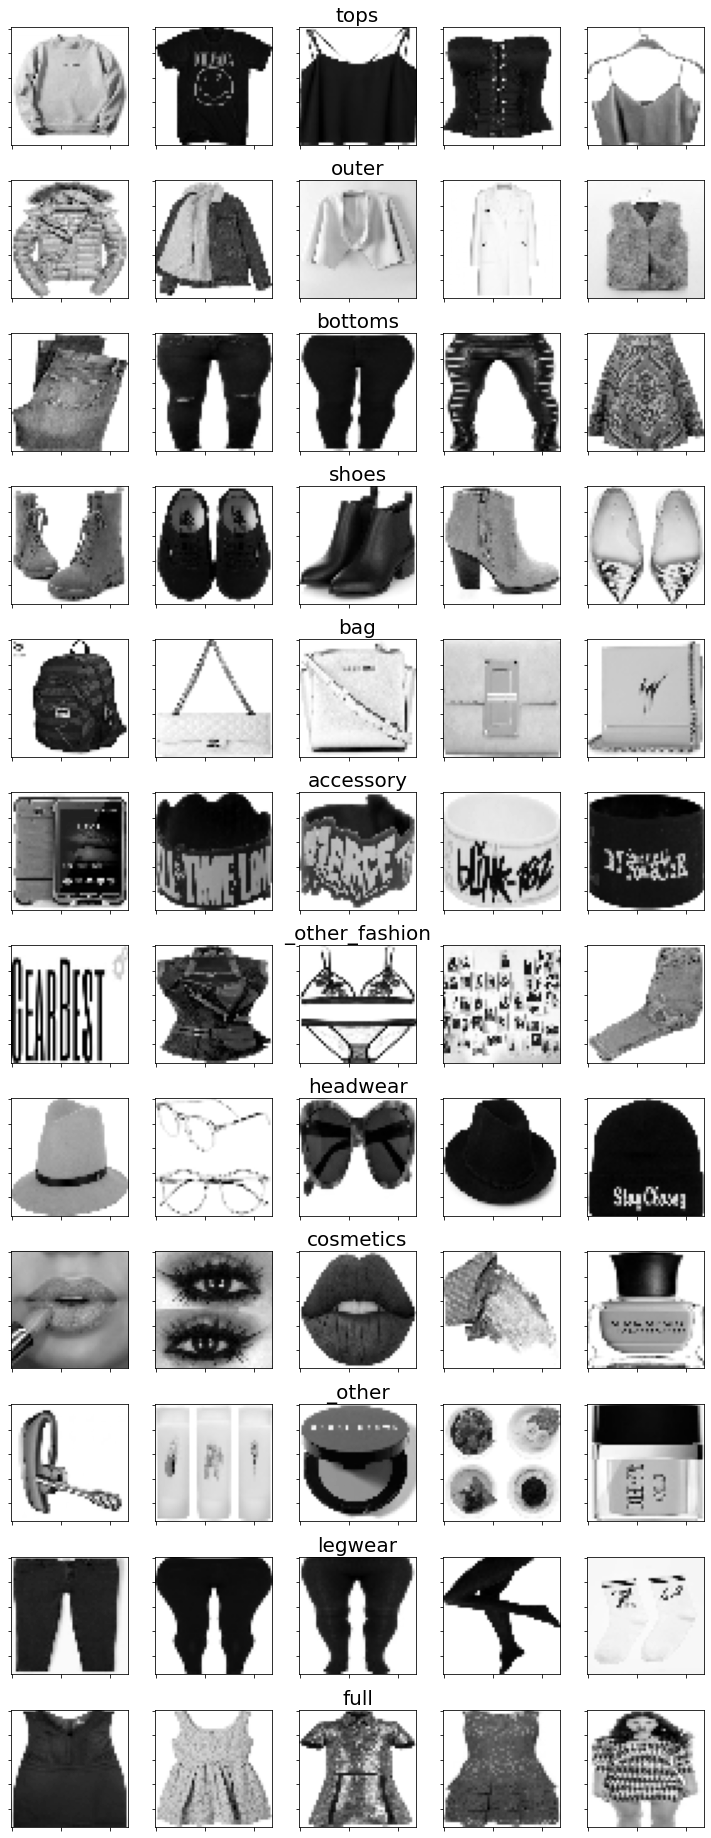

In [ ]:
unique_class_names = df["categorytype"].unique().tolist()
num_img_per_class = 5
fig, axs = plt.subplots(num_unique_categories, num_img_per_class, figsize=(25, 25))
fig.subplots_adjust(wspace=0, hspace=0.3, top=2, bottom=1, left=1, right=1.4)
count=0
for class_ind, class_name in enumerate(unique_class_names):
  rel_class_inds = df["categorytype"] == class_name
  rel_images = df_images.loc[rel_class_inds][:num_img_per_class]
  for img_ind in range(num_img_per_class):
    rel_image = rel_images.iloc[img_ind,:].values.reshape(48,48)
    axs[class_ind,img_ind].imshow(rel_image, cmap='gray')
    axs[class_ind,img_ind].set_xticklabels([])
    axs[class_ind,img_ind].set_yticklabels([])
    axs[class_ind,img_ind].set_aspect('equal')
    count+=1
    
    if img_ind == 2:
      axs[class_ind,img_ind].set_title(f"{class_name}", fontsize=20)

##### class distribution

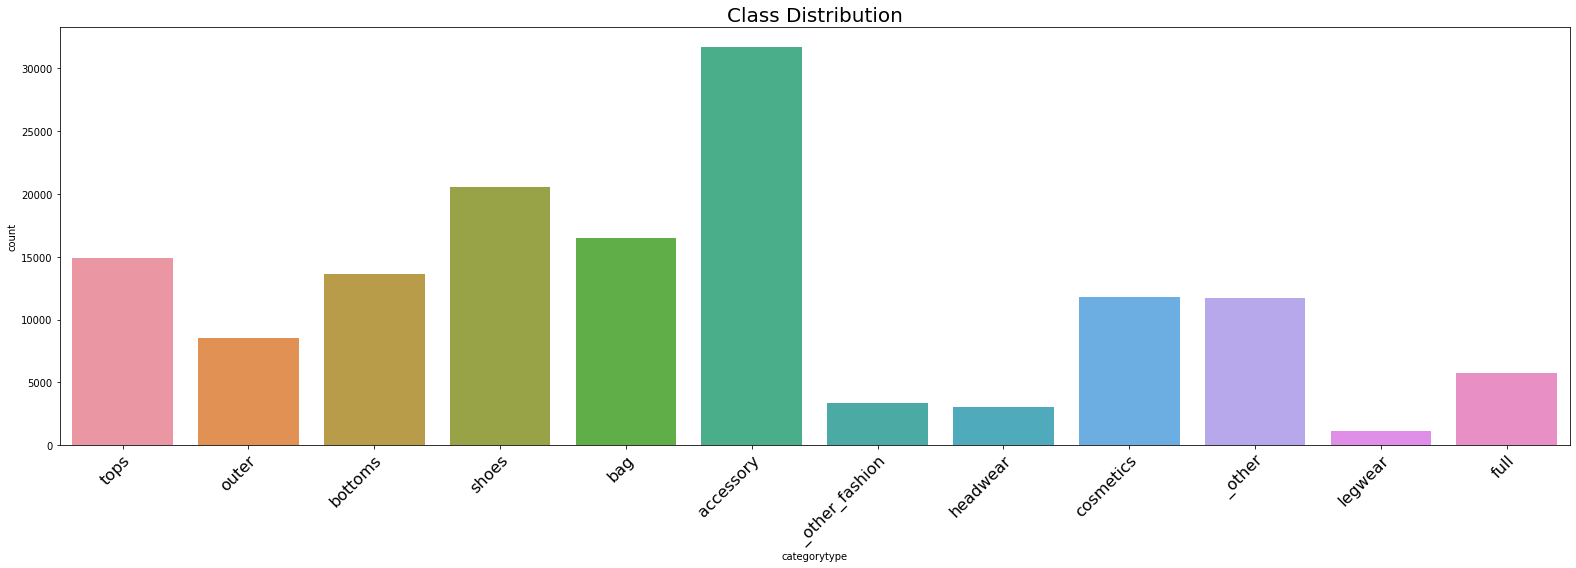

In [ ]:
plt.figure(figsize=(22,8))
ax = sns.countplot(x="categorytype", data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor', fontsize=16)
plt.title("Class Distribution", fontsize=20)
plt.tight_layout()
plt.show();

<br><br><br>
<br><br><br>
<br><br><br>

## Linear Dimensionality Reduction

Use PCA/TSNE/Iso-map on images from different labels


##### PCA

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_images)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')

Explained variation per principal component: [0.3686836  0.06700228]


''

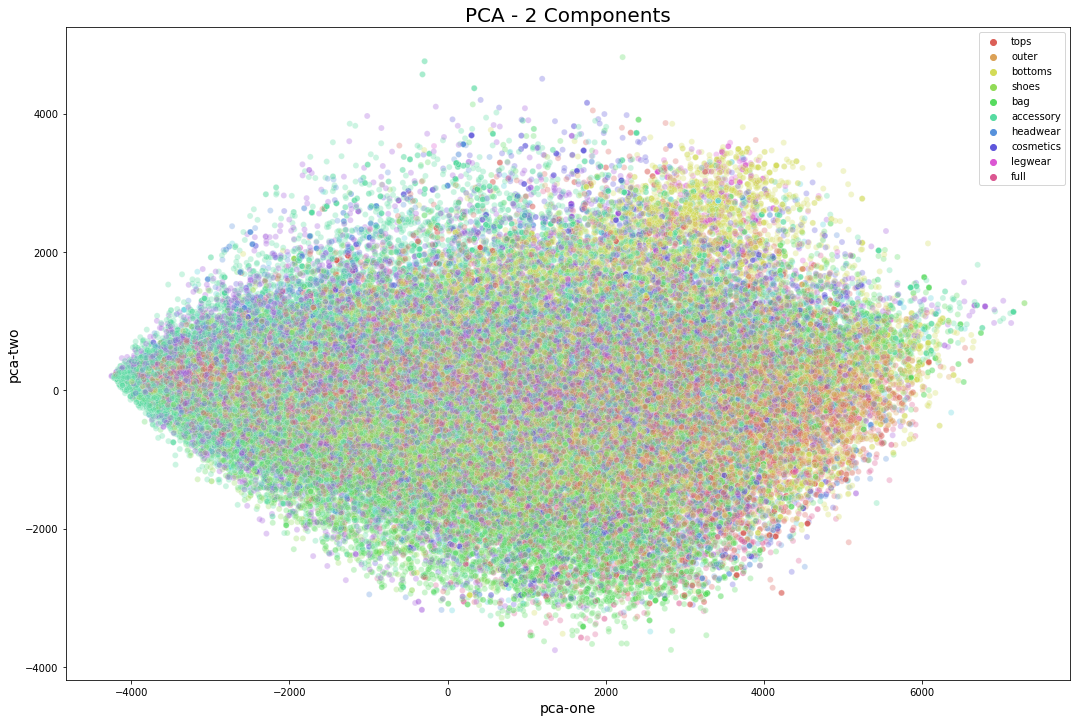

In [ ]:
plt.figure(figsize=(18,12))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="categorytype",
    palette=sns.color_palette("hls", num_unique_categories),
    data=df,
    legend="full",
    alpha=0.3,
)
plt.legend(loc='upper right')
plt.title("PCA - 2 Components", fontsize=20)
plt.xlabel("pca-one", fontsize=14)
plt.ylabel("pca-two", fontsize=14)
;

##### TSNE

In [ ]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df_images)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 142480 samples in 2.034s...
[t-SNE] Computed neighbors for 142480 samples in 1964.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 142480
[t-SNE] Computed conditional probabilities for sample 2000 / 142480
[t-SNE] Computed conditional probabilities for sample 3000 / 142480
[t-SNE] Computed conditional probabilities for sample 4000 / 142480
[t-SNE] Computed conditional probabilities for sample 5000 / 142480
[t-SNE] Computed conditional probabilities for sample 6000 / 142480
[t-SNE] Computed conditional probabilities for sample 7000 / 142480
[t-SNE] Computed conditional probabilities for sample 8000 / 142480
[t-SNE] Computed conditional probabilities for sample 9000 / 142480
[t-SNE] Computed conditional probabilities for sample 10000 / 142480
[t-SNE] Computed conditional probabilities for sample 11000 / 142480
[t-SNE] Computed conditional probabilities for sample 12000 / 142480
[t-SNE] Computed conditional pro

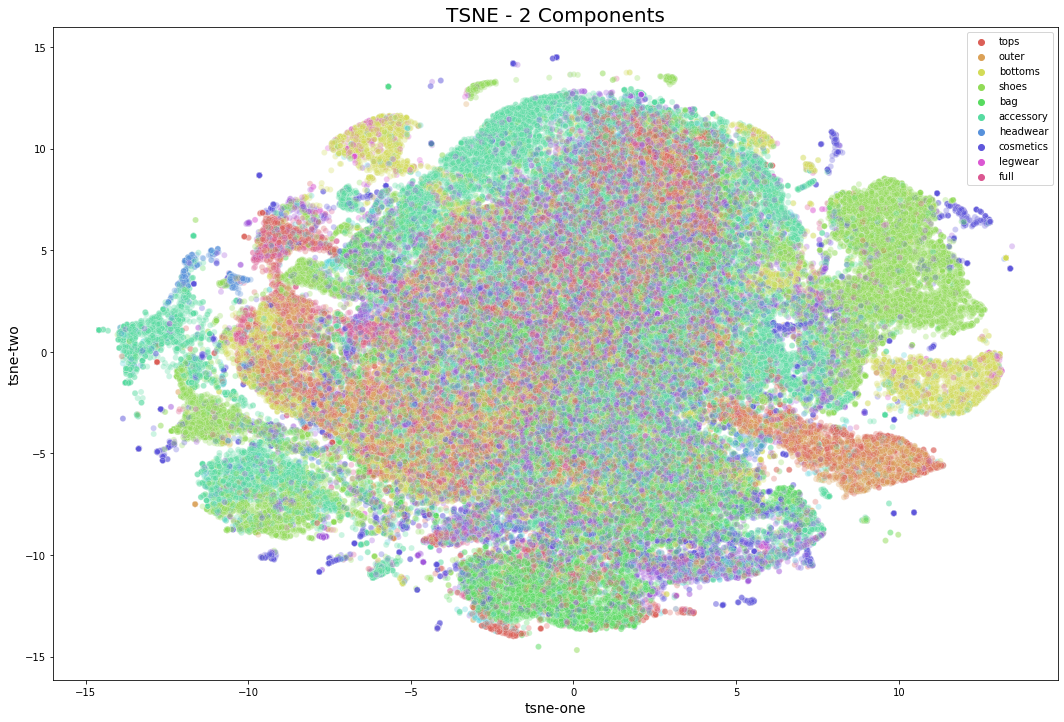

In [ ]:
plt.figure(figsize=(18,12))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="categorytype",
    palette=sns.color_palette("hls", num_unique_categories),
    data=df,
    legend="full",
    alpha=0.3
)
plt.legend(loc='upper right')
plt.title("TSNE - 2 Components", fontsize=20)
plt.xlabel("tsne-one", fontsize=14)
plt.ylabel("tsne-two", fontsize=14);